## 4. 이상치

데이터 집합에서 다른 관측치들과 동떨어진 값을 의미합니다. 이상치는 일반적인 패턴이나 동향에서 벗어난 값 으로, 예상치와는 크게 다른 값을 갖습니다. 이상치는 잘못된 측정, 데이터 수집 오류, 자연적인 이벤트의 특이한 결과등여러가지요인으로인해발생할수있습니다.

이상치는 분석과 예측에 부정적인 영향을 미칠 수 있으며, 잘못된 결과나 왜곡된 모델을 유발할 수 있습니다. 따라서 이상치의 식별과 처리는 데이터 분석의 중요한 단계입니다. 이상치를 식별하고 적절하게 처리함으로써 데이터의 정확성과 신뢰성을 향상시킬 수 있습니다.

이상치의 식별은 여러 가지 방법으로 수행될 수 있습니다. 통계적인 방법, 그래프나 시각화를 통한 방법, 도메인 지식을 활용한 방법 등이 일반적으로 사용됩니다. 이상치를 식별한 후에는 처리 방법을 결정해야 합니다. 이상치 를 제거하거나 대체하는 등의 처리 방법을 선택하여 데이터의 정확성을 유지하고 분석의 신뢰성을 향상시킬 수 있습니다.

### *이동 평균과 이동 표준 편차를 사용한 이상치 탐지*

이동 평균과 이동 표준편차를 사용한 이상치 탐지는 간단하면서도 효과적인 방법입니다. 하지만 주의해야 할 점 은이동평균과이동표준편차의윈도우크기와임계값설정에따라이상치의탐지여부가달라질수있다는점 입니다. 따라서 이 방법을 사용할 때는 적절한 윈도우 크기와 임계값 설정에 주의해야 합니다. 또한, 이 방법은 데이터의 추세와 변동성에 따라 성능이 달라질 수 있으므로 데이터의 특성을 고려하여 적용해야 합니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)

#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.randn(500)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

          Date     Value
0   2023-01-01  0.313873
1   2023-01-02  0.446145
2   2023-01-03  0.434904
3   2023-01-04  0.805943
4   2023-01-05  0.898464
5   2023-01-06  0.908380
6   2023-01-07 -0.294042
7   2023-01-08  1.535041
8   2023-01-09 -0.306510
9   2023-01-10  1.104311
10  2023-01-11 -0.354797
11  2023-01-12  2.465351
12  2023-01-13  1.199442
13  2023-01-14  0.855215
14  2023-01-15 -1.306902
15  2023-01-16 -0.155256
16  2023-01-17  0.242721
17  2023-01-18 -1.707357
18  2023-01-19  1.301962
19  2023-01-20  0.381402
20  2023-01-21  0.652864
21  2023-01-22  1.579693
22  2023-01-23 -0.196396
23  2023-01-24 -0.345295
24  2023-01-25  1.392462
25  2023-01-26 -1.747209
26  2023-01-27  0.875000
27  2023-01-28 -0.735284
28  2023-01-29  0.873491
29  2023-01-30 -0.462287
30  2023-01-31 -1.108002
31  2023-02-01 -0.485202
32  2023-02-02  1.010865
33  2023-02-03 -0.956963
34  2023-02-04 -0.031689
35  2023-02-05 -0.452036
36  2023-02-06  2.028736
37  2023-02-07  0.017241
38  2023-02-08 -0.229043


In [4]:
#이동 평균과 이동 표준편차 계산
window_size = 7
data['MovingAverage'] = data['Value'].rolling(window=window_size).mean()
data['MovingStd'] = data['Value'].rolling(window=window_size).std()
print(data['MovingAverage'])
print(data['MovingStd'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.501953
7      0.676405
8      0.568883
9      0.664513
10     0.498693
11     0.722533
12     0.764114
13     0.928293
14     0.522301
15     0.543909
16     0.420825
17     0.227602
18     0.061403
19    -0.055459
20    -0.084367
21     0.328004
22     0.322127
23     0.238125
24     0.680956
25     0.245360
26     0.315874
27     0.117567
28     0.016681
29    -0.021303
30    -0.130261
31    -0.398499
32    -0.004488
33    -0.266197
34    -0.165684
35    -0.355045
36     0.000816
37     0.161565
38     0.198159
39     0.219343
40     0.260033
41     0.197940
42     0.214725
43    -0.025327
44     0.048424
45     0.109677
46    -0.020456
47     0.038716
48    -0.031540
49     0.182495
50     0.373813
51     0.069488
52     0.124666
53     0.350819
54     0.295947
55     0.368126
56     0.066026
57    -0.122129
58     0.073139
59    -0.215149
60    -0.661223
61    -0.711888
62    -0

In [5]:
#임계값 설정, 이상치 탐지
threahold_multiplier = 2 #임계값 계수
data['Threshold'] = data['MovingAverage'] + threahold_multiplier * data['MovingStd']

#print(data['Threshold'])

#이상치 탐지 -> 임계값을 초과하는 경우는 True(이상치)로 실행합니다.
data['Outlier'] = data['Value'] > data['Threshold']
print(data['Outlier'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

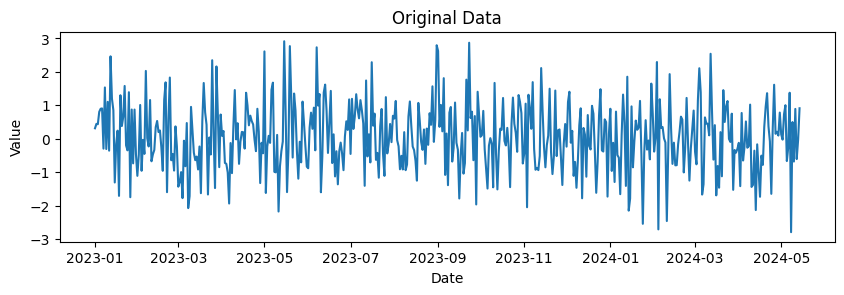

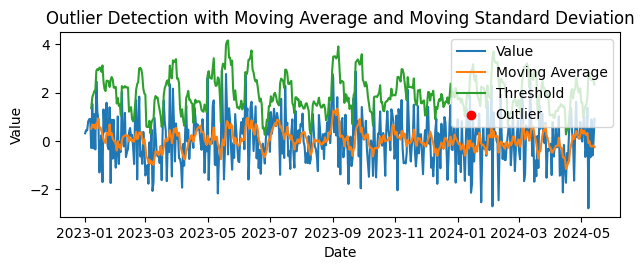

In [6]:
#시계열 데이터 시각화
plt.figure(figsize=(10, 6))

#원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')
plt.show()

# 이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')
plt.legend()
plt.tight_layout()

### *지수 평활법을 사용한 이상치 탐지*

시계열 데이터의 추세(Trend)와 계절성(Seasonality)을 고려하여 데이터를 부드럽게 추정하는 방법입니다. 이 방법은 최근 관측값에 높은 가중치를 부여하고, 과거 관측값에 점차 감소하는 가중치를 부여하여 추세 를 추정합니다. 따라서, 이 방법을 사용하면 시계열 데이터의 특성을 잘 반영하면서도 부드러운 추정 결과 를얻을수있습니다.

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16] + [10] * 90  #이상치 포함된 데이터
"""
values 는 10, 12, 11, 15, 9, 13, 8, 14, 10, 16으로 시작하고, 
그 뒤에 10이 총 90번 반복되는 형태입니다. 이렇게 반복되는 10은 이상치로 간주될 수 있습니다.
"""


#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

         Date  Value
0  2023-01-01     10
1  2023-01-02     12
2  2023-01-03     11
3  2023-01-04     15
4  2023-01-05      9
5  2023-01-06     13
6  2023-01-07      8
7  2023-01-08     14
8  2023-01-09     10
9  2023-01-10     16
10 2023-01-11     10
11 2023-01-12     10
12 2023-01-13     10
13 2023-01-14     10
14 2023-01-15     10
15 2023-01-16     10
16 2023-01-17     10
17 2023-01-18     10
18 2023-01-19     10
19 2023-01-20     10
20 2023-01-21     10
21 2023-01-22     10
22 2023-01-23     10
23 2023-01-24     10
24 2023-01-25     10
25 2023-01-26     10
26 2023-01-27     10
27 2023-01-28     10
28 2023-01-29     10
29 2023-01-30     10
30 2023-01-31     10
31 2023-02-01     10
32 2023-02-02     10
33 2023-02-03     10
34 2023-02-04     10
35 2023-02-05     10
36 2023-02-06     10
37 2023-02-07     10
38 2023-02-08     10
39 2023-02-09     10
40 2023-02-10     10
41 2023-02-11     10
42 2023-02-12     10
43 2023-02-13     10
44 2023-02-14     10
45 2023-02-15     10
46 2023-02-16

In [10]:
#지수 평활법 모델 학습
model = ExponentialSmoothing(data['Value'], trend='add')
model_fit = model.fit()

#추세 계산
trend = model_fit.predict(start=0, end=len(data['Value']) - 1)

#추세에서의 편차 계산
deviation = data['Value'] - trend

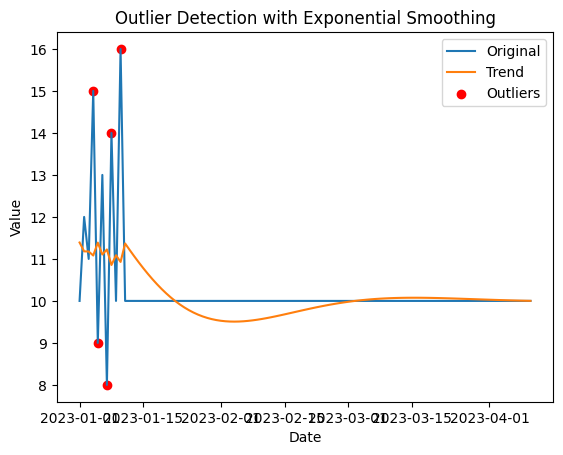

In [11]:
#이상치 탐지
threshold = 2
outliers = abs(deviation)  > threshold

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Exponential Smoothing')
plt.legend()
plt.show()

### *Z-점수 기반 이상치 탐지 실습*

통계적인 방법 중 하나로, 데이터의 평균과 표준편차를 활용하여 이상치를 탐지하는 기법입니다. 이 방법은 주어진 데이터 포인트가 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 나타내는 Z-점수를 계산하고, 이 를 기준으로 이상치를 판단합니다.

데이터 포인트와 평균 간의 거리를 표준편차로 정규화한 값으로, Z-점수가 임계값보다 크면 해당 데이터 포인 트를 이상치로 간주합니다. 일반적으로 임계값은 2 이상으로 설정되며, Z-점수가 임계값을 초과하는 데이터 포인트는 이상치로 판단됩니다.

데이터의 분포에 기반하여 이상치를 식별하므로, 통계적인 방법을 활용하여 이상치를 탐지할 수 있습니다. 그러나 이 방법은 데이터가 정규분포를 따르는 가정을 전제로 하기 때문에, 데이터의 분포가 다른 경우 제대 로 작동하지 않을 수 있습니다. 따라서 데이터의 특성을 고려하여 적절한 이상치 탐지 방법을 선택하는 것이 중요합니다.

In [12]:
from scipy import stats

In [13]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)

#이상치 추가
values[20] = 50

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

         Date      Value
0  2023-01-01  -0.205011
1  2023-01-02   0.430661
2  2023-01-03   0.300594
3  2023-01-04  -1.187662
4  2023-01-05  -0.330995
5  2023-01-06  -0.314057
6  2023-01-07  -0.425964
7  2023-01-08   0.236549
8  2023-01-09   0.943499
9  2023-01-10   0.574438
10 2023-01-11   0.361334
11 2023-01-12   0.249256
12 2023-01-13   1.042783
13 2023-01-14  -1.555745
14 2023-01-15   0.033313
15 2023-01-16  -0.344238
16 2023-01-17  -1.848975
17 2023-01-18   0.336725
18 2023-01-19  -0.632531
19 2023-01-20  -1.523024
20 2023-01-21  50.000000
21 2023-01-22   0.170250
22 2023-01-23  -0.056896
23 2023-01-24  -0.036922
24 2023-01-25   0.197045
25 2023-01-26  -0.593229
26 2023-01-27   0.536370
27 2023-01-28   0.029125
28 2023-01-29   0.526718
29 2023-01-30   1.970833
30 2023-01-31  -0.195002
31 2023-02-01   0.358933
32 2023-02-02   0.037733
33 2023-02-03   0.213122
34 2023-02-04  -1.079694
35 2023-02-05   0.147102
36 2023-02-06  -1.754145
37 2023-02-07  -0.193168
38 2023-02-08  -1.603196


In [14]:
#z_scores 계산
z_scores = np.abs(stats.zscore(data['Value']))

#임계값
threshold = 3

#z_scores가 임계값을 초과하는지 확인
outliers = z_scores > threshold

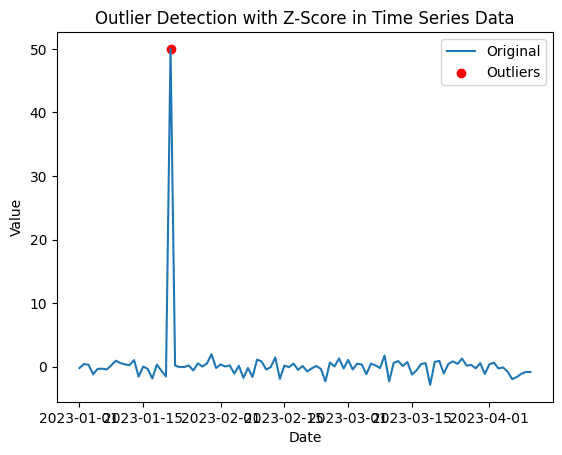

Detected Outliers:
20    50.0
Name: Value, dtype: float64


In [15]:
# 이상치 시각화 
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.show()

# 이상치 출력 
outlier_values = data[outliers]['Value']
print("Detected Outliers:")
print(outlier_values)

### *스무딩*

시계열 데이터에서 잡음이나 불규칙한 변동을 완화시키는 기법으로, 데이터의 추세나 패턴을 부드럽게 만들어 주는 과정입니다. 스무딩은 이동평균이나 지수평활법과 같은 방법을 사용하여 데이터의 변동을 완화시킵니다.

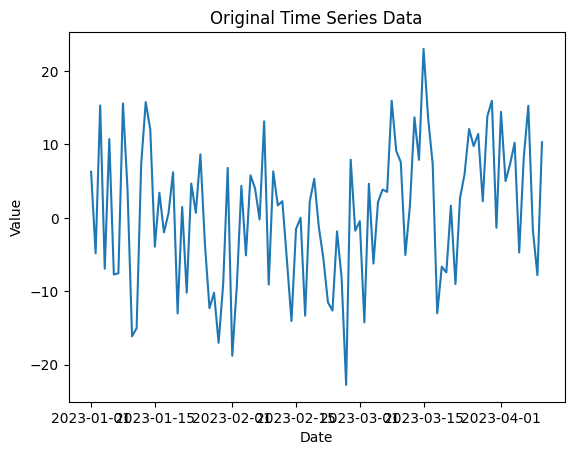

In [16]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 #정규분포를 따르는 데이터 생성

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data')
plt.show()

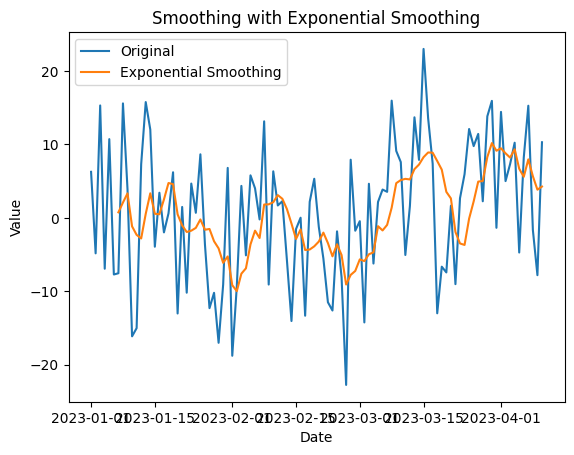

In [17]:
#이동평균을 사용한 스무딩
window_size = 7  #이동평균 윈도우 크기 설정

data['ExponentialSmoothing'] = data['Value'].rolling(window=window_size).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['ExponentialSmoothing'], label='Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Exponential Smoothing')
plt.legend()
plt.show()

### *트랜드 실습*

시계열 데이터에서 장기적으로 증가하거나 감소하는 패턴을 나타냅니다. 트랜드는 데이터의 추세를 보여주며, 이를 이해하는 것은 데이터의 특성을 파악하는 데 도움이 됩니다.

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16] * 10

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

         Date  Value
0  2023-01-01     10
1  2023-01-02     12
2  2023-01-03     11
3  2023-01-04     15
4  2023-01-05      9
5  2023-01-06     13
6  2023-01-07      8
7  2023-01-08     14
8  2023-01-09     10
9  2023-01-10     16
10 2023-01-11     10
11 2023-01-12     12
12 2023-01-13     11
13 2023-01-14     15
14 2023-01-15      9
15 2023-01-16     13
16 2023-01-17      8
17 2023-01-18     14
18 2023-01-19     10
19 2023-01-20     16
20 2023-01-21     10
21 2023-01-22     12
22 2023-01-23     11
23 2023-01-24     15
24 2023-01-25      9
25 2023-01-26     13
26 2023-01-27      8
27 2023-01-28     14
28 2023-01-29     10
29 2023-01-30     16
30 2023-01-31     10
31 2023-02-01     12
32 2023-02-02     11
33 2023-02-03     15
34 2023-02-04      9
35 2023-02-05     13
36 2023-02-06      8
37 2023-02-07     14
38 2023-02-08     10
39 2023-02-09     16
40 2023-02-10     10
41 2023-02-11     12
42 2023-02-12     11
43 2023-02-13     15
44 2023-02-14      9
45 2023-02-15     13
46 2023-02-16

In [20]:
#주기 설정
period = 7  #데이터가 7일 간격으로 반복되는 패턴을 가지고 있다는 가정

#주기성 분해
result = seasonal_decompose(data['Value'], model='additive', period=period)

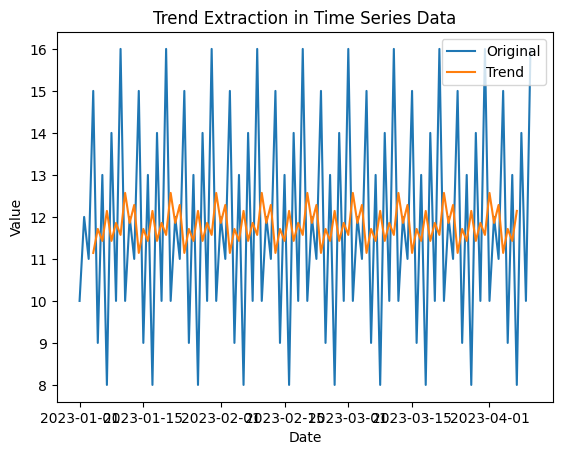

In [21]:
# 추세 계산
trend = result.trend

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend Extraction in Time Series Data')
plt.legend()
plt.show()

### *주어진 시계열 데이터에서 이상치 탐지 및 처리 실습*

In [22]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10

#이상치 추가
values[15] = 70

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)
print(data['Value'].iloc[15])


         Date      Value
0  2023-01-01   2.079022
1  2023-01-02   9.375532
2  2023-01-03 -15.043919
3  2023-01-04   6.629609
4  2023-01-05  -2.946967
5  2023-01-06  16.738233
6  2023-01-07   9.230372
7  2023-01-08  -6.470734
8  2023-01-09  25.745323
9  2023-01-10   8.513223
10 2023-01-11  -1.775233
11 2023-01-12   2.428613
12 2023-01-13   2.235356
13 2023-01-14   3.450135
14 2023-01-15   3.419730
15 2023-01-16  70.000000
16 2023-01-17   5.852323
17 2023-01-18  -6.161770
18 2023-01-19   3.026618
19 2023-01-20 -18.622215
20 2023-01-21  -1.499607
21 2023-01-22   8.042778
22 2023-01-23   8.730509
23 2023-01-24  -8.542832
24 2023-01-25  -4.571978
25 2023-01-26  12.122412
26 2023-01-27  -0.118564
27 2023-01-28 -14.077108
28 2023-01-29  15.997401
29 2023-01-30 -14.143400
30 2023-01-31 -20.714691
31 2023-02-01  -5.534536
32 2023-02-02  -8.969772
33 2023-02-03   7.294722
34 2023-02-04  17.943735
35 2023-02-05   1.404512
36 2023-02-06  -6.865484
37 2023-02-07  -0.490191
38 2023-02-08   2.421223


In [23]:
#이상치 탐지
z_scores = np.abs(stats.zscore(data['Value']))

#임계치 설정
threshold = 3

#z-scores 임계값 초과하는 체크
outliers = z_scores > threshold

#이상치를 -> 결측치로 처리
data.loc[outliers, 'Value'] = np.nan #loc[행, 열]

#결측치 보간
data['Value'] = data['Value'].interpolate()  #선형보간

print(data.loc[outliers, 'Value'])

15    4.636027
Name: Value, dtype: float64


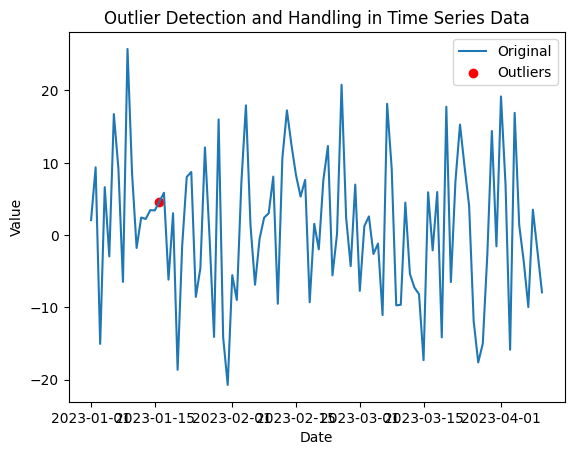

이상치 처리된 데이터 확인 >>  -1.499606739912494


In [24]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection and Handling in Time Series Data')
plt.legend()
plt.show()

# 처리된 데이터 확인
print("이상치 처리된 데이터 확인 >> " , data['Value'].iloc[20])